<a href="https://colab.research.google.com/github/Bhavani-Rajan/DS-Unit-2-Applied-Modeling/blob/master/module2/assignment_applied_modeling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

#### Load the data

In [22]:
!pip install category_encoders==2.*
!pip install eli5

     |████████████████████████████████| 112kB 2.8MB/s 


In [0]:
import pandas as pd
import numpy as np
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
col_headers = ['class','cap-shape','cap-surface','cap-color',
               'bruises','odor','gill-attachment','gill-spacing',
              'gill-size','gill-color','stalk-shape','stalk-root',
              'stalk-surface-above-ring','stalk-surface-below-ring',
              'stalk-color-above-ring','stalk-color-below-ring',
              'veil-type','veil-color','ring-number','ring-type',
              'spore-print-color','population','habitat']

df = pd.read_csv(data_url,names=col_headers)

In [81]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [82]:
df.describe(exclude='number').T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


#### Split data into train and test

stratify specifies target columns 

In [117]:
df.shape

(8124, 23)

In [0]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size=0.2, random_state=45)

In [125]:
train.shape ,test.shape

((6499, 23), (1625, 23))

#### Split train into train and validation

In [0]:
train, val = train_test_split(train, test_size=0.2, random_state=45)

In [127]:
train.shape ,val.shape

((5199, 23), (1300, 23))

#### clean up the data

In [0]:
def wrangle(X):
#   class_map = {'p': 0, 'e': 1}
#   bruises = {'t':1,'f':0 }
#   X['class'] = X['class'].map(class_map)
#   X['bruises'] = X['bruises'].map(bruises)

  X.replace('?',np.nan)
  return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)


In [105]:
train.shape , val.shape, test.shape

((5199, 23), (1300, 23), (1625, 23))

In [106]:
train.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [107]:
train.describe(exclude='number').T

,count,unique,top,freq
class,5199,2,e,2690
cap-shape,5199,6,x,2372
cap-surface,5199,4,y,2023
cap-color,5199,10,n,1410
bruises,5199,2,f,3044
odor,5199,9,n,2266
gill-attachment,5199,2,f,5065
gill-spacing,5199,2,c,4343
gill-size,5199,2,b,3633
gill-color,5199,12,b,1080


#### Arrange data into X features matrix and y target vector

In [0]:
target = 'class'
X_train = train.drop(columns=target)
y_train = train[target]

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]


In [121]:
X_train.shape,X_val.shape,X_test.shape

((5199, 22), (1300, 22), (1625, 22))

In [110]:
X_val.dtypes

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [111]:
y_val.shape

(1300,)

### baseline accuracy

In [122]:
y = df['class'] == 'e'
X = df.drop(columns='class')
y.value_counts(normalize=True)

True     0.517971
False    0.482029
Name: class, dtype: float64

In [113]:
y.value_counts()

True     4208
False    3916
Name: class, dtype: int64

### without pipelines

In [0]:
train = train.replace('?',np.nan)
val = val.replace('?',np.nan)
test = test.replace('?',np.nan)


In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
target = 'class'
features = ['cap-shape','cap-surface','cap-color',
               'bruises','odor','gill-attachment','gill-spacing',
              'gill-size','gill-color','stalk-shape','stalk-root',
              'stalk-surface-above-ring','stalk-surface-below-ring',
              'stalk-color-above-ring','stalk-color-below-ring',
              'veil-type','veil-color','ring-number','ring-type',
              'spore-print-color','population','habitat']

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]



In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,random_state=45,n_jobs=-1)


#### randomforestclassifier model

In [116]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
  ce.OrdinalEncoder(),
  SimpleImputer(),
  RandomForestClassifier(n_estimators=100,random_state=45,n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 1.0


#### Default feature importance

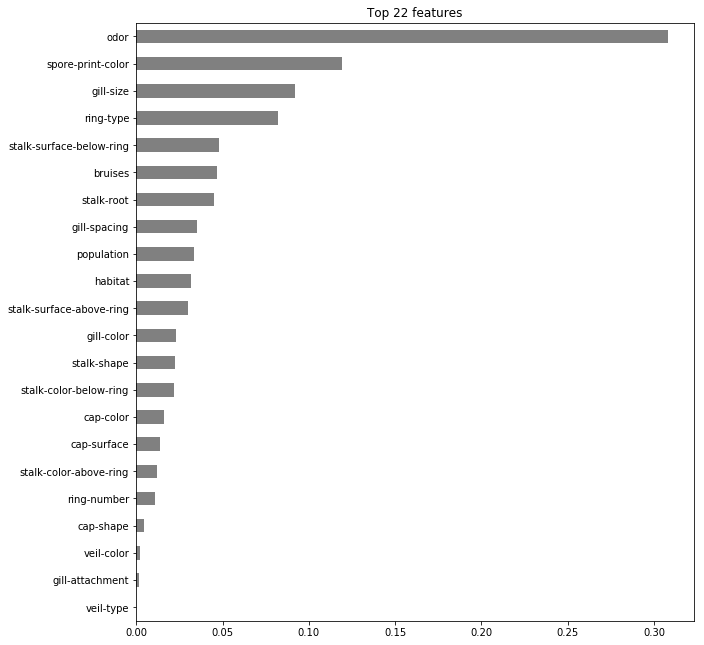

In [74]:
# Get feature importances
rf = pipeline_rf.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 22
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

#### Drop-column of importance

In [75]:
column = 'odor'

pipeline_rf = make_pipeline(
  ce.OrdinalEncoder(),
  SimpleImputer(strategy='median'),
  RandomForestClassifier(n_estimators=100,random_state=45,n_jobs=-1)
)

pipeline_rf.fit(X_train.drop(columns=column),y_train)
score_without = pipeline_rf.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

Validation Accuracy without odor: 1.0


### frogs


In [130]:
from google.colab import files
uploaded = files.upload()

Saving Frogs_MFCCs.csv to Frogs_MFCCs.csv


In [0]:
df = pd.read_csv('Frogs_MFCCs.csv')

In [133]:
df.dtypes

MFCCs_ 1    float64
MFCCs_ 2    float64
MFCCs_ 3    float64
MFCCs_ 4    float64
MFCCs_ 5    float64
MFCCs_ 6    float64
MFCCs_ 7    float64
MFCCs_ 8    float64
MFCCs_ 9    float64
MFCCs_10    float64
MFCCs_11    float64
MFCCs_12    float64
MFCCs_13    float64
MFCCs_14    float64
MFCCs_15    float64
MFCCs_16    float64
MFCCs_17    float64
MFCCs_18    float64
MFCCs_19    float64
MFCCs_20    float64
MFCCs_21    float64
MFCCs_22    float64
Family       object
Genus        object
Species      object
RecordID      int64
dtype: object

In [132]:
df.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,-0.115682,0.043371,0.150945,-0.039244,-0.101748,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,25.220014
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,0.186792,0.155983,0.206880,0.152515,0.187618,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,13.214399
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,-0.901989,-0.799441,-0.644116,-0.590380,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,1.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,-0.269860,-0.033931,-0.002859,-0.132980,-0.255929,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,15.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,-0.153322,0.051054,0.196921,-0.050715,-0.143259,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,22.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,0.026689,0.132432,0.324589,0.039157,0.017348,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,37.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,0.523033,0.690889,0.945710,0.575749,0.668924,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,60.000000


In [134]:
df.describe(exclude='number').T

,count,unique,top,freq
Family,7195,4,Leptodactylidae,4420
Genus,7195,8,Adenomera,4150
Species,7195,10,AdenomeraHylaedactylus,3478


In [135]:
df['Family'].value_counts()

Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: Family, dtype: int64

In [136]:
df['Genus'].value_counts()

Adenomera        4150
Hypsiboas        1593
Ameerega          542
Dendropsophus     310
Leptodactylus     270
Scinax            148
Osteocephalus     114
Rhinella           68
Name: Genus, dtype: int64

In [137]:
df['Species'].value_counts()

AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: Species, dtype: int64

In [138]:
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,-0.075622,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,-0.095004,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,-0.072827,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,-0.162258,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,-0.100749,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [0]:
df['RecordID'].value_counts()

In [140]:
df['Family'].value_counts(normalize=True)

Leptodactylidae    0.614315
Hylidae            0.300903
Dendrobatidae      0.075330
Bufonidae          0.009451
Name: Family, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size=0.2, random_state=45)

In [148]:
train.shape,test.shape

((5756, 26), (1439, 26))

In [0]:
train,val = train_test_split(train, test_size=0.2, random_state=45)

In [150]:
train.shape,val.shape

((4604, 26), (1152, 26))

In [0]:

#target = ['Family','Genus',	'Species',	'RecordID']
target = ['Family']
features =['MFCCs_ 1',	'MFCCs_ 2',	'MFCCs_ 3',	'MFCCs_ 4',	'MFCCs_ 5',
           'MFCCs_ 6'	,'MFCCs_ 7',	'MFCCs_ 8',	'MFCCs_ 9',	'MFCCs_10',	
           'MFCCs_11',	'MFCCs_12',	'MFCCs_13',	'MFCCs_14',	'MFCCs_15',	
           'MFCCs_16',	'MFCCs_17',	'MFCCs_18',	'MFCCs_19',	'MFCCs_20',	
           'MFCCs_21',	'MFCCs_22']


X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]
          

In [159]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
  ce.OrdinalEncoder(),
  SimpleImputer(),
  RandomForestClassifier(n_estimators=100,random_state=45,n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))
print('Test Accuracy', pipeline.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Validation Accuracy 0.9809027777777778
Test Accuracy 0.9826268241834607


#### thyroid database
url = https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/thyroid0387.data

In [168]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/thyroid0387.data'
df = pd.read_csv(data_url,header=None)
df.head(-20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,?,f,?,f,?,f,?,f,?,other,-[840801013]
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-[840801014]
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-[840801042]
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-[840803046]
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S[840803047]
5,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-[840803048]
6,77,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,21,other,-[840803068]
7,28,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2.6,t,116,f,?,f,?,f,?,SVI,-[840807019]
8,28,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.2,t,1.8,t,76,f,?,f,?,f,?,other,-[840808060]
9,28,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.9,t,1.7,t,83,f,?,f,?,f,?,other,-[840808073]


In [161]:
df.shape

(9171, 30)

In [166]:
df['29']

KeyError: ignored

### skin non skin database

In [170]:
from google.colab import files
uploaded = files.upload()


Saving Skin_NonSkin.txt to Skin_NonSkin.txt


In [177]:
col_hdrs =['x1','x2','x3','y']
df = pd.read_csv('Skin_NonSkin.txt',sep=None,header=None,names=col_hdrs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  


In [178]:
df.head()

,x1,x2,x3,y
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [179]:
df.shape

(245057, 4)

In [180]:
df['y'].value_counts()

2    194198
1     50859
Name: y, dtype: int64